<a href="https://colab.research.google.com/github/MUMADE-TADM/s1_python-manunu93/blob/main/5_titanic_Ejercicio_(bueno).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Que influyó en las muertes de pasajeros del Titanic?
 ¿La clase de pasaje? ¿La edad? ¿El costo del pasaje?

# Copie este notebook en su cuenta junto con los datos **titanic.csv** 
moodle de clase

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


## Utilice estas librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import graphviz

## Lea el fichero de datos en un DataFrame de pandas **datos**

In [ ]:
import io 
datos = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Investigue si hay datos erróneos o vacios con valor **Nan** y elimínelos

In [ ]:
datos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
datos.dropna(axis=0, inplace=True) #elinima NA, con inplace lo que hacemos es decirle que lo impute

In [ ]:
datos.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## Con los datos límpios cree el conjunto de datos de entrenamiento
- **X** con las columnas 'Pclass','Age' y 'Fare'
- **y** con la columna 'Survived'

In [ ]:
y = datos[['Survived']].copy(deep = True) #deep es para hacer una copia profunda,  construye un nuevo objeto compuesto y luego, recursivamente, inserta copias en él de los objetos encontrados en el original.
X= datos[['Pclass', 'Age', 'Fare']].copy(deep = True)

In [ ]:
y.head(5)

,Survived
1,1
3,1
6,0
10,1
11,1


In [ ]:
X.head(5)

,Pclass,Age,Fare
1,1,38.0,71.2833
3,1,35.0,53.1000
6,1,54.0,51.8625
10,3,4.0,16.7000
11,1,58.0,26.5500


## Cree el árbol de clasificación **Ad**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Ad = tree.DecisionTreeClassifier(max_depth=3)
Ad = Ad.fit(X, y)



[Text(0.5, 0.875, 'X[1] <= 44.5\ngini = 0.441\nsamples = 183\nvalue = [60, 123]'),
 Text(0.25, 0.625, 'X[2] <= 10.481\ngini = 0.363\nsamples = 126\nvalue = [30, 96]'),
 Text(0.125, 0.375, 'X[2] <= 7.85\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.375, 0.375, 'X[1] <= 17.5\ngini = 0.305\nsamples = 117\nvalue = [22, 95]'),
 Text(0.3125, 0.125, 'gini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.4375, 0.125, 'gini = 0.334\nsamples = 99\nvalue = [21, 78]'),
 Text(0.75, 0.625, 'X[1] <= 47.5\ngini = 0.499\nsamples = 57\nvalue = [30, 27]'),
 Text(0.625, 0.375, 'X[2] <= 52.277\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.6875, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.875, 0.375, 'X[1] <= 60.5\ngini = 0.491\nsamples = 46\nvalue = [20, 26]'),
 Text(0.8125, 0.

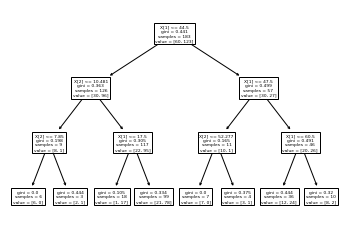

In [ ]:
tree.plot_tree(Ad)

## Muestre árbol obtenido en forma de texto.

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree)
print(r)

|--- feature_1 <= 44.50
|   |--- feature_2 <= 10.48
|   |   |--- feature_2 <= 7.85
|   |   |   |--- class: 0
|   |   |--- feature_2 >  7.85
|   |   |   |--- class: 0
|   |--- feature_2 >  10.48
|   |   |--- feature_1 <= 17.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  17.50
|   |   |   |--- class: 1
|--- feature_1 >  44.50
|   |--- feature_1 <= 47.50
|   |   |--- feature_2 <= 52.28
|   |   |   |--- class: 0
|   |   |--- feature_2 >  52.28
|   |   |   |--- class: 0
|   |--- feature_1 >  47.50
|   |   |--- feature_1 <= 60.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  60.50
|   |   |   |--- class: 0



In [ ]:
y.columns

Index(['Survived'], dtype='object')

## Exporte el árbol obtenido a un fichero **titanic.pdf**
Utilize la libreria graphviz

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(Ad, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("titanic")

'titanic.pdf'

## Muestre de forma enriquecida el árbol obtenido
Utilize la libreria graphviz

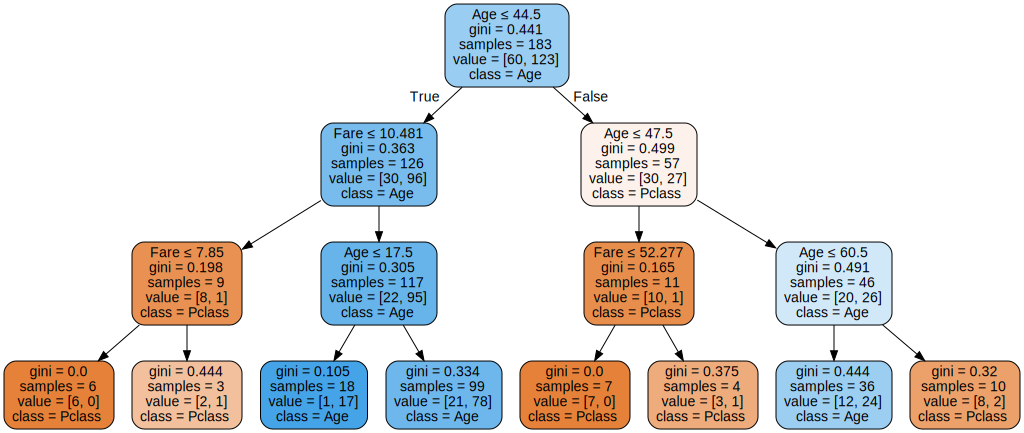

In [ ]:
dot_data = tree.export_graphviz(Ad, out_file=None, 
                     feature_names=X.columns,  
                     class_names=X.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph





## ¿Que característas son las más influyentes o decisivas?

In [ ]:

l= {X.columns[0]:Ad.feature_importances_[0], X.columns[1]:Ad.feature_importances_[1], X.columns[2]:Ad.feature_importances_[2]}
print(l)

{'Pclass': 0.0, 'Age': 0.6204886075608184, 'Fare': 0.3795113924391817}


## Realiza alguna inferencia.
Que propone para las filas 5 y 80 del Titanic.csv

In [ ]:
datos.iloc[5]

PassengerId                       22
Survived                           1
Pclass                             2
Name           Beesley, Mr. Lawrence
Sex                             male
Age                             34.0
SibSp                              0
Parch                              0
Ticket                        248698
Fare                            13.0
Cabin                            D56
Embarked                           S
Name: 21, dtype: object

In [ ]:
datos.iloc[80]

PassengerId                                                  395
Survived                                                       1
Pclass                                                         3
Name           Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...
Sex                                                       female
Age                                                         24.0
SibSp                                                          0
Parch                                                          2
Ticket                                                   PP 9549
Fare                                                        16.7
Cabin                                                         G6
Embarked                                                       S
Name: 394, dtype: object